# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [1]:
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [2]:
df = df[df['dt'] >= pd.Timestamp('1950-01-01')]
df.reset_index(drop=True, inplace=True)
YEARS = pd.unique(df.dt.dt.year).reshape(-1, 1) # будем использовать дальше в некоторых заданиях
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

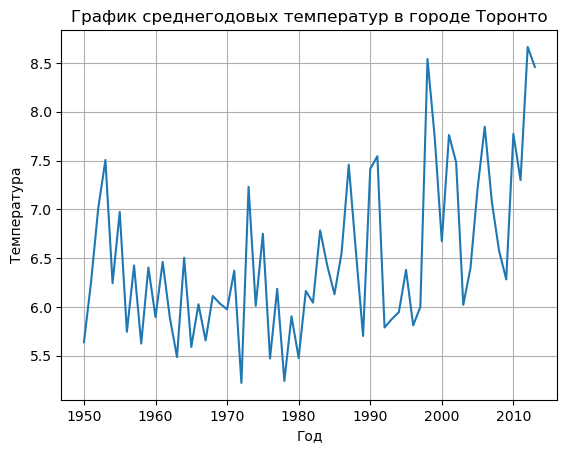

In [3]:
T_df = df[df['City'] == 'Toronto']
T_df.groupby(T_df['dt'].dt.year).mean()['AverageTemperature'].plot()
plt.title("График среднегодовых температур в городе Торонто")
plt.xlabel('Год')
plt.ylabel('Температура')
plt.grid()
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [4]:
df.groupby(df['City']).var()['AverageTemperature'].idxmax()

'Harbin'

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

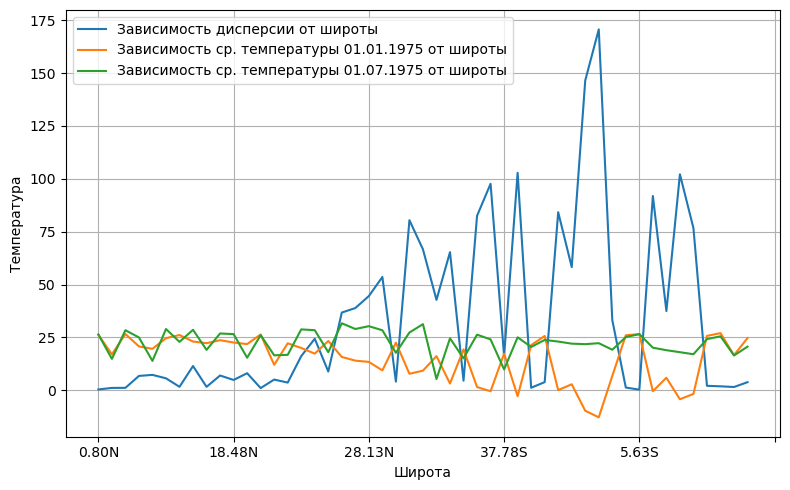

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))

latitude_var = df.groupby(df['Latitude']).var()
january1975_avg = df[df['dt'] == pd.Timestamp('1975-01-01')].groupby(df['Latitude']).mean()
july1975_avg = df[df['dt'] == pd.Timestamp('1975-07-01')].groupby(df['Latitude']).mean()

latitude_var.plot(y='AverageTemperature', ax=ax, label="Зависимость дисперсии от широты")
january1975_avg.plot(y='AverageTemperature', ax=ax, label="Зависимость ср. температуры 01.01.1975 от широты")
july1975_avg.plot(y='AverageTemperature', ax=ax, label="Зависимость ср. температуры 01.07.1975 от широты")

plt.xlabel('Широта')
plt.ylabel('Температура')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

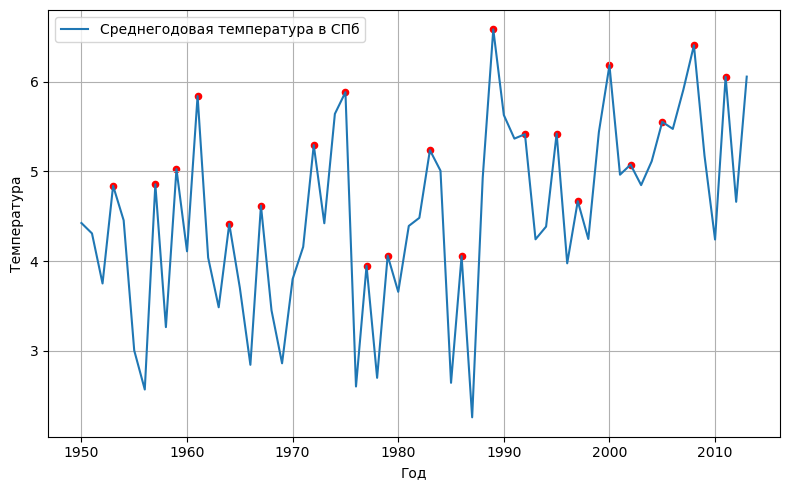

In [12]:
from scipy.signal import argrelextrema
from numpy import greater_equal

fig, ax = plt.subplots(figsize=(8, 5))

annualy_spb = df[df['City'] == 'Saint Petersburg'].groupby(df.dt.dt.year).mean()
annualy_spb.plot(y='AverageTemperature', ax=ax, label="Среднегодовая температура в СПб")
local_max = annualy_spb.iloc[argrelextrema(annualy_spb['AverageTemperature'].values,
                                           greater_equal,
                                           order=1)[0]]

local_max = local_max.reset_index(level=0).iloc[1:-1, :]  # обрежем крайние года, у которых нет 1-го "соседа"
local_max.plot(x='dt', y='AverageTemperature', kind='scatter', ax=ax, color='r')

plt.xlabel('Год')
plt.ylabel('Температура')
plt.grid()
plt.tight_layout()
plt.show()

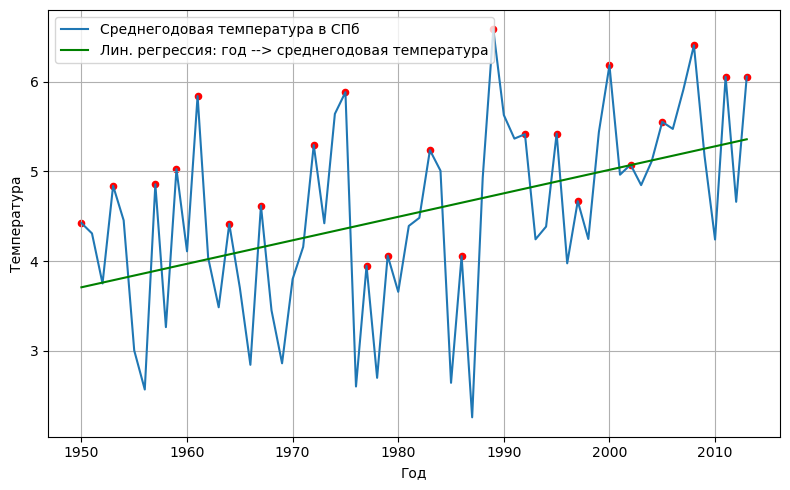

In [7]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(YEARS,
           annualy_spb['AverageTemperature'].values)

avg_temperature_regression = linreg.predict(annualy_spb.index.values.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(8, 5))

annualy_spb.plot(y='AverageTemperature', ax=ax, label="Среднегодовая температура в СПб")
local_max.plot(x='dt', y='AverageTemperature', kind='scatter', ax=ax, color='r')
ax.plot(annualy_spb.index.values, avg_temperature_regression,
        label="Лин. регрессия: год --> среднегодовая температура",
        color='g')

plt.xlabel('Год')
plt.ylabel('Температура')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

## 3.6.1 
Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.

In [24]:
mean_annualy_temp_by_city = df.groupby([df.dt.dt.year, 'City'])['AverageTemperature'].mean()
max_annualy_temp_by_city = mean_annualy_temp_by_city.groupby('City').max()
max_annualy_temp_by_city.head()

City
Abidjan        27.445417
Addis Abeba    19.539000
Ahmadabad      28.095833
Aleppo         19.979417
Alexandria     22.459583
Name: AverageTemperature, dtype: float64

In [25]:
min_annualy_temp_by_city = mean_annualy_temp_by_city.groupby('City').min()
min_annualy_temp_by_city.head()

City
Abidjan        25.841917
Addis Abeba    17.080167
Ahmadabad      26.061083
Aleppo         16.433583
Alexandria     19.869750
Name: AverageTemperature, dtype: float64

In [26]:
abs(max_annualy_temp_by_city - min_annualy_temp_by_city).idxmax()

'Mashhad'

## 3.6.2
Самая большая средняя разница между средней температурой января и средней температурой июля.

In [11]:
january_avg_per_year = df[df.dt.dt.month == 1].set_index(['City'])['AverageTemperature']
july_avg_per_year = df[df.dt.dt.month == 7].set_index(['City'])['AverageTemperature']
avg_diff_january_july = (abs(january_avg_per_year - july_avg_per_year)).groupby('City').mean()
avg_diff_january_july.idxmax()

'Harbin'

## 3.6.3
Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [12]:
not_nan_temp_cnt = df[~df['AverageTemperature'].isna()].groupby('City').count()['dt']
negative_temp_cnt = df[df['AverageTemperature'] < 0].groupby('City').count()['dt']
(negative_temp_cnt / not_nan_temp_cnt).idxmax()

'Harbin'

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению температуры в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента.

## 3.7.1

In [13]:
max_year = YEARS.max()
last_decade = max_year - 10 + 1
last_decade_df = df[df.dt.dt.year.between(last_decade, max_year)]
last_decade_jan_df = last_decade_df[last_decade_df.dt.dt.month == 1]
last_decade_avg_jan_df = last_decade_jan_df.groupby('City').mean()

In [14]:
lat_lon_df = df[['City', 'Latitude', 'Longitude']].drop_duplicates().set_index('City')
lat_lon_df.head()

,Latitude,Longitude
City,,
Abidjan,5.63N,3.23W
Addis Abeba,8.84N,38.11E
Ahmadabad,23.31N,72.52E
Aleppo,36.17N,37.79E
Alexandria,31.35N,30.16E


In [15]:
last_decade_avg_jan_df = pd.concat([last_decade_avg_jan_df, lat_lon_df], axis=1)[['AverageTemperature',
                                                                                  'Latitude',
                                                                                  'Longitude']]
last_decade_avg_jan_df.head()

,AverageTemperature,Latitude,Longitude
City,,,
Abidjan,27.2830,5.63N,3.23W
Addis Abeba,18.2239,8.84N,38.11E
Ahmadabad,19.9577,23.31N,72.52E
Aleppo,5.9257,36.17N,37.79E
Alexandria,14.8218,31.35N,30.16E


Переведем широту и долготу в читаемый для plotly формат.

In [16]:
def convert_lat_lon(x):
    if x.endswith('W') or x.endswith('S'):
        x = -float(x.strip('W')) if x.endswith('W') else -float(x.strip('S'))
    else:
        x = float(x.strip('E')) if x.endswith('E') else float(x.strip('N'))
    return x

last_decade_avg_jan_df['Latitude'] = last_decade_avg_jan_df['Latitude'].apply(convert_lat_lon)
last_decade_avg_jan_df['Longitude'] = last_decade_avg_jan_df['Longitude'].apply(convert_lat_lon)
last_decade_avg_jan_df.head()

,AverageTemperature,Latitude,Longitude
City,,,
Abidjan,27.2830,5.63,-3.23
Addis Abeba,18.2239,8.84,38.11
Ahmadabad,19.9577,23.31,72.52
Aleppo,5.9257,36.17,37.79
Alexandria,14.8218,31.35,30.16


In [17]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

fig = px.scatter_geo(last_decade_avg_jan_df,
                     lat=last_decade_avg_jan_df.Latitude,
                     lon=last_decade_avg_jan_df.Longitude,
                     hover_name=last_decade_avg_jan_df.index,
                     color=last_decade_avg_jan_df.AverageTemperature,
                     title="Средняя температура в январе за последние 10 лет"
                    )
fig.show()

## 3.7.2
Вычислите прямую с "трендом" по изменению температуры в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании 3.5). Отобразите города цветом, который зависит от угла наклона этой прямой.

In [18]:
mean_annualy_temp_by_city = df.groupby([df.dt.dt.year, 'City'])['AverageTemperature'].mean()
linreg_slope_by_city = dict()

for city in pd.unique(df.City):
    linreg = LinearRegression()
    linreg.fit(YEARS, 
               mean_annualy_temp_by_city.xs(city, level=1)
              )
    
    linreg_slope_by_city[city] = linreg.coef_[0]

In [19]:
last_decade_avg_jan_df['Trend line slope'] = pd.Series(linreg_slope_by_city)
last_decade_avg_jan_df.drop(['AverageTemperature'], axis=1, inplace=True)
last_decade_avg_jan_df.head()

,Latitude,Longitude,Trend line slope
City,,,
Abidjan,5.63,-3.23,0.015600
Addis Abeba,8.84,38.11,0.018589
Ahmadabad,23.31,72.52,0.013634
Aleppo,36.17,37.79,0.014909
Alexandria,31.35,30.16,0.013608


In [20]:
fig = px.scatter_geo(last_decade_avg_jan_df,
                     lat=last_decade_avg_jan_df.Latitude,
                     lon=last_decade_avg_jan_df.Longitude,
                     hover_name=last_decade_avg_jan_df.index,
                     color=last_decade_avg_jan_df['Trend line slope'],
                     title="Динамика изменения среднегодовой температуры за последние 64 года"
                    )
fig.show()

## 3.7.3
 В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента.

In [21]:
import pwlf

mean_annualy_temp_by_city = df.groupby([df.dt.dt.year, 'City'])['AverageTemperature'].mean()
segment_linreg_slope_by_city = dict()

for city in pd.unique(df.City):
    my_pwlf = pwlf.PiecewiseLinFit(YEARS.reshape(-1),
                                   mean_annualy_temp_by_city.xs(city, level=1).values
                                  )
    
    segment_linreg = my_pwlf.fit(4)

    slopes = my_pwlf.calc_slopes()
    segment_linreg_slope_by_city[city] = slopes[-1]

Из-за того, что могут быть выбросы, я применю логарифмирование (после сдвига в $R_{+}$)

In [22]:
last_decade_avg_jan_df['Segment trend line slope'] = pd.Series(segment_linreg_slope_by_city)
last_decade_avg_jan_df['Segment trend line logslope'] = last_decade_avg_jan_df['Segment trend line slope'] - \
                                                        last_decade_avg_jan_df['Segment trend line slope'].min() + 1
last_decade_avg_jan_df['Segment trend line logslope'] = np.log(last_decade_avg_jan_df['Segment trend line logslope'])
last_decade_avg_jan_df.drop(['Trend line slope'], axis=1, inplace=True)
last_decade_avg_jan_df.head()

,Latitude,Longitude,Segment trend line slope,Segment trend line logslope
City,,,,
Abidjan,5.63,-3.23,0.027886,0.584848
Addis Abeba,8.84,38.11,1.266279,1.109589
Ahmadabad,23.31,72.52,0.030223,0.586149
Aleppo,36.17,37.79,0.043398,0.593453
Alexandria,31.35,30.16,-0.246087,0.419200


In [23]:
hover_data = {'Original segment trend line slope': last_decade_avg_jan_df['Segment trend line slope']}

fig = px.scatter_geo(last_decade_avg_jan_df,
                     lat=last_decade_avg_jan_df.Latitude,
                     lon=last_decade_avg_jan_df.Longitude,
                     hover_name=last_decade_avg_jan_df.index,
                     hover_data=hover_data,
                     color=last_decade_avg_jan_df['Segment trend line logslope'],
                     title="Динамика изменения среднегодовой температуры за последний из 4-х сегментов"
                    )
fig.show()

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

[Ссылка на проект](https://github.com/dmsy4/setup-practicing-project)